# Data Analysis for Avivo Discharge Data
## Using cleaned 'discharge' dataset

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize = (8,5))
import statsmodels.api as sm
import pylab as pl
import scipy

In [200]:
#importing cleaned discharge dataset
df=pd.read_csv('master.xlsx - Sheet1 (1).csv')

#adding a row for completion
def Completion (row):
    if row['Reason.for.Discharge'] == 'Completed program':
        return 1
    if row['Reason.for.Discharge']=='Transferred to other program':
        return 1
    return 0
df.apply (lambda row: Completion (row), axis=1)
df['Completion']=df.apply(lambda row: Completion (row),axis=1)
df.sample(3)
df.columns.values
#df.dtypes

array(['Unnamed: 0', 'Form Date', 'Program_admission', 'Staff_admission',
       'Client Number', 'Age_admission', 'Age of first use (Primary)',
       'Age of first use (Secondary)', 'Age of first use (Tertiary)',
       'Are any children living with someone else due to CPS court order or other action',
       'CHSR Dimension 1', 'CHSR Dimension 2', 'CHSR Dimension 3',
       'CHSR Dimension 4', 'CHSR Dimension 5', 'CHSR Dimension 6',
       'Client currently involved with CPS', 'Current CD Treatment',
       'Current labor status', 'Current marital status',
       'Currently enrolled in school or job training program',
       'Currently smoke cigarettes',
       'Currently under the jurisdiction of the court or on probation/parole of',
       'Did drug court refer?', 'Does client have children',
       'Does this involvement result from',
       "Driver's license revoked due to DWI", 'Education',
       'For how many children has the client lost parental rights',
       'Hispanic Eth

***
***
# EDA Measures/Variables

- **Reason for Discharge**
- **Demographic**
 - Gender
 - Race
 - Age
- **Child-related measures**
 - Does Client have Children
 - Number of Children
 - CPS Involvement
- **Lisestyle Measures**
 - Labor Force Status
 - Where Client has been Living for the last 30 days
 - Number of Self Help Programs Attended in the last 30 days
- **CHSR Dimensions**

## Reason for Discharge

AxesSubplot(0.125,0.125;0.775x0.755)


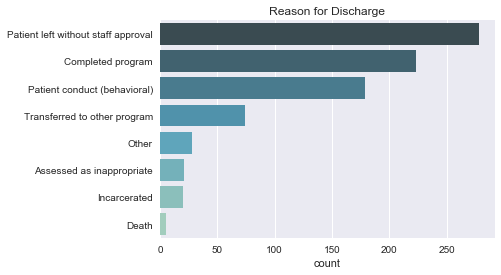

In [196]:
a=sns.countplot(data=df, y='Reason.for.Discharge',palette='GnBu_d',order=df['Reason.for.Discharge'].value_counts().index)
a.set_ylabel('')
a.legend(loc=1)
a.set_title('Reason for Discharge')
print(a)

#the most common reason for discharge is completing the program (especially since "transferred to other program" s also
#considered completion by Avivo). Next most common is the patient leaving without approval.

***
# Demographic Analysis
## Gender

AxesSubplot(0.125,0.125;0.775x0.755)


Completion,0,1
Sex_x,,
Female,234,129
Male,295,167


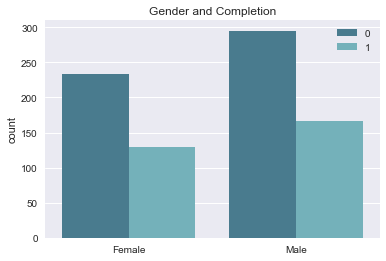

In [197]:
b=sns.countplot(data=df,x='Sex_x',hue='Completion',palette='GnBu_d')
b.set_xlabel('')
b.legend(loc=1)
b.set_title('Gender and Completion')
print(b)
#tab1_cr={'Gender': ['Female','Male'],'Completion Rate(%)':['35.5,'36.1']}
#tab1_cr=pd.DataFrame(data=tab1_cr)
#tab1_cr
tab1 = pd.crosstab(df['Sex_x'], df['Completion'])
tab1

#Using 'Sex_x' because it removes the 'unknown' values
#looks like slightly fewer women go through treatment, and women have a slightly lower completion rate than men

## Race

AxesSubplot(0.125,0.125;0.775x0.755)


,0,1,Completion Rate,Primary Race
0,75,18,19.4,American Indian or Alaska Native
1,4,1,20.0,Asian
2,240,157,39.5,Black or African American
3,15,6,28.6,Declined to Specify
4,6,12,66.7,Hispanic or Latino
5,9,9,50.0,Other
6,167,87,34.2,White


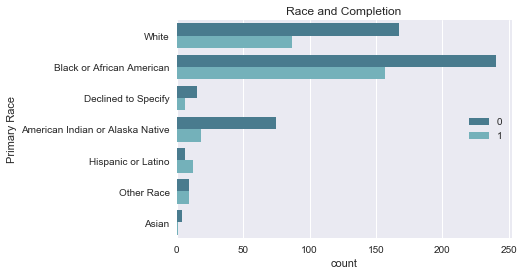

In [198]:
c=sns.countplot(data=df, y='Race1', hue='Completion',palette='GnBu_d')
c.set_ylabel('Primary Race')
c.legend(loc=5)
c.set_title('Race and Completion')
print(c)

tab2_cr={'Primary Race':['American Indian or Alaska Native','Asian','Black or African American','Declined to Specify','Hispanic or Latino','Other','White'], 
       '0':['75','4','240','15','6','9','167'],
        '1':['18','1','157','6','12','9','87'],
        'Completion Rate':['19.4','20.0','39.5','28.6','66.7','50.0','34.2']}
tab2_cr=pd.DataFrame(data=tab2_cr)
tab2_cr
#tab2 = pd.crosstab(df['Race1'], df['Completion'])
#tab2

#the "Hispanic/Latino" demographic has the highest completion rate, with "Other" and "Black/African American" the second and third highest in completion rate

## Age

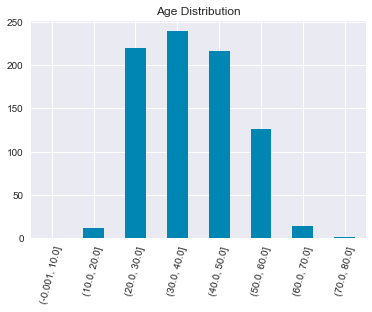

In [201]:
#there's probably a better way to do age...
bins=pd.cut(df['Age.at.Discharge'], bins=[0,10,20,30,40,50,60,70,80], include_lowest=True)
ax=bins.value_counts(sort=False).plot.bar(rot=75, figsize=(6,4), color='#0086b3')
ax.set_title('Age Distribution')
plt.show()

***
# Child-Related Measures
## Does Client have Children?

AxesSubplot(0.125,0.125;0.775x0.755)


,0,1,Completion Rate,Does Client have Children
0,116,93,44.5,No
1,234,161,40.7,Yes


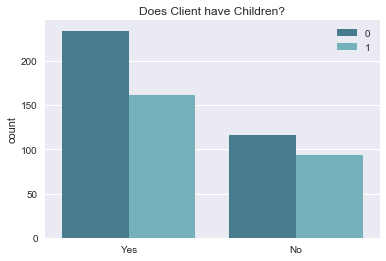

In [202]:
ch= sns.countplot(data=df, x='Does.client.have.children', hue='Completion',palette='GnBu_d')
ch.set_xlabel('')
ch.legend(loc=1)
ch.set_title('Does Client have Children?')
print(ch)
#tabch = pd.crosstab(df['Does.client.have.children'], df['Completion'])
#tabch
ch={'Does Client have Children':['No','Yes'], 
       '0':['116','234'],
        '1':['93','161'],
        'Completion Rate':['44.5','40.7']}
ch=pd.DataFrame(data=ch)
ch

#clients with no children have a higher completion rate than those who do

## Number of Children

,0,1,Completion Rate,Number of Children
0,113,94,45.4,0
1,62,32,34.0,1
2,47,44,48.3,2
3,31,31,50.0,3
4,15,10,40.0,4
5,12,5,29.4,5
6,8,4,33.3,6
7,0,2,100,7
8,1,1,50.0,8
9,3,1,33.3,10


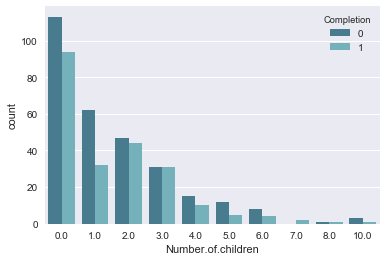

In [203]:
sns.countplot(data=df, x='Number.of.children', hue='Completion',palette='GnBu_d')
#tabnc = pd.crosstab(df['Number.of.children'], df['Completion'])
#tabnc
nc={'Number of Children':['0','1','2','3','4','5','6','7','8','10'], 
       '0':['113','62','47','31','15','12','8','0','1','3'],
        '1':['94','32','44','31','10','5','4','2','1','1'],
        'Completion Rate':['45.4','34.0','48.3','50.0','40.0','29.4','33.3','100','50.0','33.3']}
nc=pd.DataFrame(data=nc)
nc

#seven children has the highest completion rate, with three and eight children having the second and third highest completion rates

## Child Protection Services (CPS) Involvement

AxesSubplot(0.125,0.125;0.775x0.755)


,0,1,Completion Rate,Currently Involved with CPS
0,115,89,43.6,No
1,153,134,46.7,Not applicable - no children/no cps involvement
2,59,23,28.0,Yes


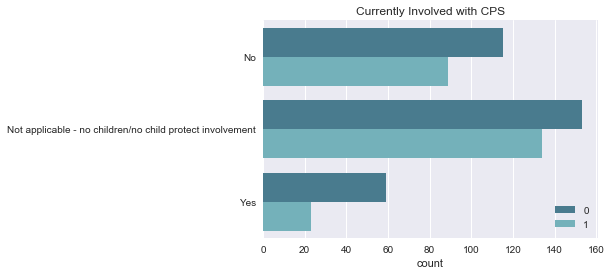

In [204]:
ccps= sns.countplot(data=df, y='Currently.involved.with.CPS', hue='Completion',palette='GnBu_d')
ccps.set_ylabel('')
ccps.legend(loc=4)
ccps.set_title('Currently Involved with CPS')
print(ccps)
#tabccps = pd.crosstab(df['Currently.involved.with.CPS'], df['Completion'])
#tabccps
ccps={'Currently Involved with CPS':['No','Not applicable - no children/no cps involvement','Yes'], 
       '0':['115','153','59'],
        '1':['89','134','23'],
        'Completion Rate':['43.6','46.7','28.0']}
ccps=pd.DataFrame(data=ccps)
ccps

#for clients with children, those who are not involved with CPS at time of discharge are more likely to complete

***
# Lifestyle Measures
## Labor Force Status

AxesSubplot(0.125,0.125;0.775x0.755)


,0,1,Completion Rate,Current Labor Force Status
0,23,15,39.4,Disabled
1,4,14,77.8,Employed full-time
2,14,25,64.1,Employed part-time
3,3,0,00.0,Inmate of institution
4,67,111,62.3,Laid off/unemployed - looking for work
5,227,83,26.8,Laid off/unemployed - not looking for work
6,1,1,50.0,Occassional/seasonal work
7,2,6,75.0,Other
8,1,0,00.0,Retired
9,3,2,40.0,Student


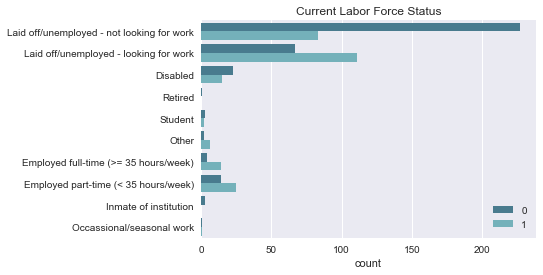

In [205]:
lfs= sns.countplot(data=df, y='Current.labor.force.status', hue='Completion',palette='GnBu_d')
lfs.set_ylabel('')
lfs.legend(loc=4)
lfs.set_title('Current Labor Force Status')
print(lfs)
#tablfs = pd.crosstab(df['Current.labor.force.status'], df['Completion'])
#tablfs
lfs={'Current Labor Force Status':['Disabled','Employed full-time','Employed part-time','Inmate of institution','Laid off/unemployed - looking for work','Laid off/unemployed - not looking for work','Occassional/seasonal work','Other','Retired','Student'], 
       '0':['23','4','14','3','67','227','1','2','1','3'],
        '1':['15','14','25','0','111','83','1','6','0','2'],
        'Completion Rate':['39.4','77.8','64.1','00.0','62.3','26.8','50.0','75.0','00.0','40.0']}
lfs=pd.DataFrame(data=lfs)
lfs

#those who are employed, or looking for work, have much higher completion rates than other clients

## Where Client has been Living for the past 30 days

AxesSubplot(0.125,0.125;0.775x0.755)


,0,1,Completion Rate,Where Client has been living in the Past 30 Days
0,1,1,50.0,Children living with their family
1,134,82,37.9,Dependent living - dependent children and/or a...
2,218,129,37.2,Homeless
3,85,74,46.5,"Independent living - including on own, self su..."


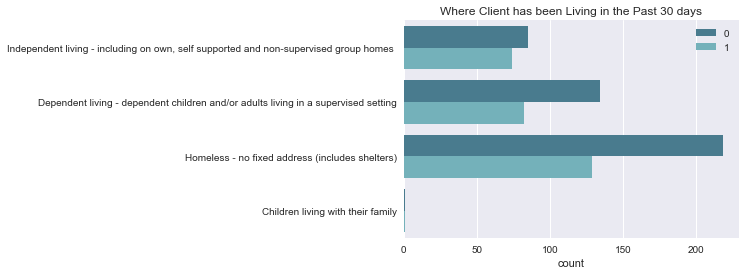

In [206]:
cl= sns.countplot(data=df, y='Where.client.has.been.living.in.past.30.days', hue='Completion',palette='GnBu_d')
cl.set_ylabel('')
cl.legend(loc=1)
cl.set_title('Where Client has been Living in the Past 30 days')
print(cl)
#tablcl = pd.crosstab(df['Where.client.has.been.living.in.past.30.days'], df['Completion'])
#tablcl
cl={'Where Client has been living in the Past 30 Days':['Children living with their family','Dependent living - dependent children and/or adults living in a supervised setting','Homeless','Independent living - including on own, self supported and non-supervised group homes'], 
      '0':['1','134','218','85'],
        '1':['1','82','129','74'],
        'Completion Rate':['50.0','37.9','37.2','46.5']}
cl=pd.DataFrame(data=cl)
cl

#clients who have had children living with their family in the past 30 days have the highest completion rate
#clients are less likely to complete if they have been homeless for the past 30 days

## Number of Self Help Programs Attended in the past 30 Days

,0,1,Completion Rate,Number.of.self.help.programs.attended.in.past.30.days
0,82,52,38.8,Once per week
1,1,16,94.1,Less than once per week
2,26,58,69.0,3+ times per week
3,28,95,77.2,Two or Three times per week
4,151,38,20.1,No attendance
5,48,21,30.4,"Some attendance, frequency unknown"


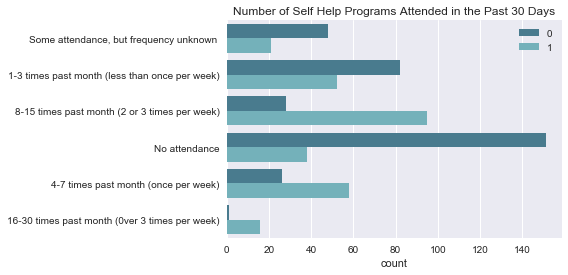

In [192]:
shp=sns.countplot(data=df, y='Number.of.self.help.programs.attended.in.past.30.days', hue='Completion',palette='GnBu_d')
shp.set_ylabel('')
shp.legend(loc=1)
shp.set_title('Number of Self Help Programs Attended in the Past 30 Days')
#tabshp = pd.crosstab(df['Number.of.self.help.programs.attended.in.past.30.days'], df['Completion'])
#tabshp
shp={'Number.of.self.help.programs.attended.in.past.30.days':['Once per week','Less than once per week','3+ times per week','Two or Three times per week','No attendance','Some attendance, frequency unknown'], 
       '0':['82','1','26','28','151','48'],
        '1':['52','16','58','95','38','21'],
        'Completion Rate':['38.8','94.1','69.0','77.2','20.1','30.4']}
shp=pd.DataFrame(data=shp)
shp

#clients who attended less than once per week have the highest completion rate
#clients who had no attendance have the lowest completion rate

***
# CHSR Dimensions

Text(0,0.5,u'Dimension 6')

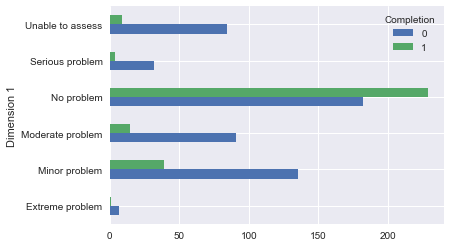

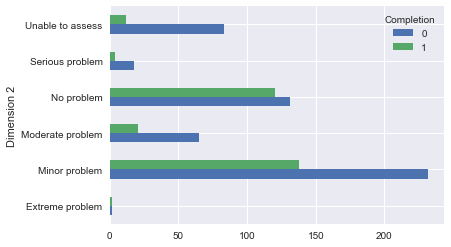

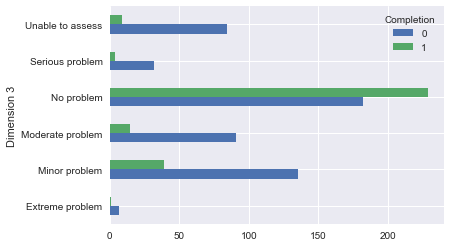

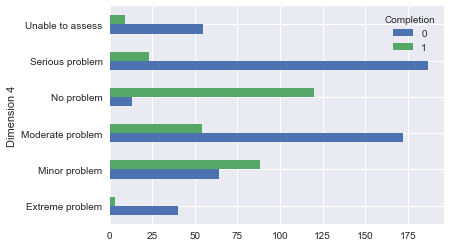

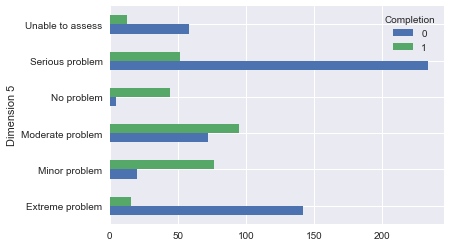

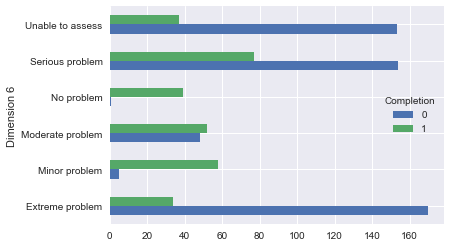

In [185]:
chsr1=pd.crosstab(df['CHSR.Dimension.1'],df['Completion']).plot(kind='barh')
chsr1.set_ylabel('Dimension 1')
chsr2=pd.crosstab(df['CHSR.Dimension.2'],df['Completion']).plot(kind='barh')
chsr2.set_ylabel('Dimension 2')
chsr3=pd.crosstab(df['CHSR.Dimension.1'],df['Completion']).plot(kind='barh')
chsr3.set_ylabel('Dimension 3')
chsr4=pd.crosstab(df['CHSR.Dimension.4'],df['Completion']).plot(kind='barh')
chsr4.set_ylabel('Dimension 4')
chsr5=pd.crosstab(df['CHSR.Dimension.5'],df['Completion']).plot(kind='barh')
chsr5.set_ylabel('Dimension 5')
chsr6=pd.crosstab(df['CHSR.Dimension.6'],df['Completion']).plot(kind='barh')
chsr6.set_ylabel('Dimension 6')

#as expected, clients who completed treatment rank more frequently than clients who don't complete as less severe in the CHSR dimensions
#more should be done with this measure as we combine with Admission data